In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
df= pd.read_csv('F://bank_oversample_new.csv')

In [3]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,result
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [4]:
X= df.iloc[:,:-1]
Y= df.iloc[:,-1]

In [5]:
np.random.seed(1001)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2)

In [6]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6400, 42), (1600, 42), (6400,), (1600,))

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model_lr= LogisticRegression()

In [9]:
model_lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_pred= model_lr.predict(x_test)
y_pred_prob = model_lr.predict_proba(x_test)

In [11]:
y_pred_prob 

array([[0.9072639 , 0.0927361 ],
       [0.97476771, 0.02523229],
       [0.55979873, 0.44020127],
       ...,
       [0.97882786, 0.02117214],
       [0.01601703, 0.98398297],
       [0.00336058, 0.99663942]])

In [12]:
import innomatics

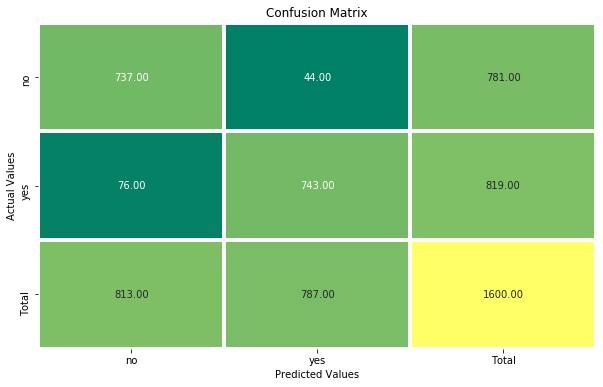

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.91      0.94      0.92       781
           1       0.94      0.91      0.93       819

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.92      1600
weighted avg       0.93      0.93      0.93      1600


************************************Kappa Score************************************


Kappa Score = 0.8500578682914562

******************************Area Under Curve Score******************************


AUC Score = 0.9254329395174464
Number of probabilities to build ROC = 198


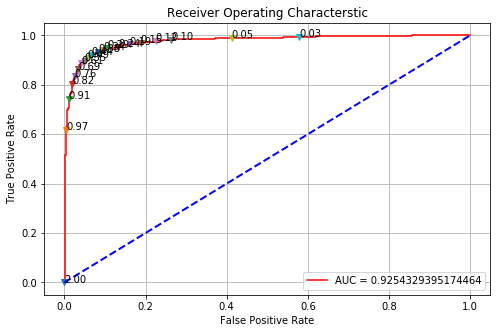

In [13]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob[:,1], label=['no','yes'],n=10,verbose=True)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
model_dt = DecisionTreeClassifier(criterion='gini',max_depth=10)

In [16]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
y_pred1= model_dt.predict(x_test)
y_pred_prob1 = model_dt.predict_proba(x_test)

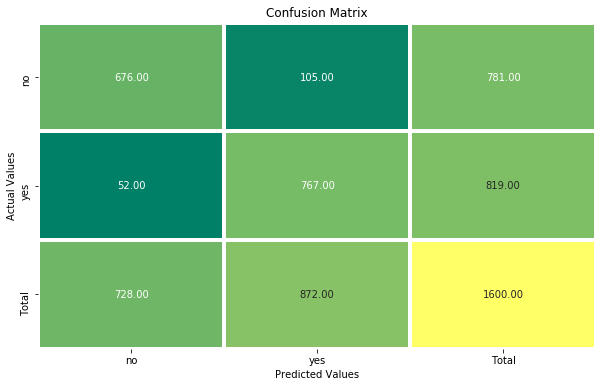

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.93      0.87      0.90       781
           1       0.88      0.94      0.91       819

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600


************************************Kappa Score************************************


Kappa Score = 0.8033296170564581

******************************Area Under Curve Score******************************


AUC Score = 0.9010324573704855
Number of probabilities to build ROC = 40


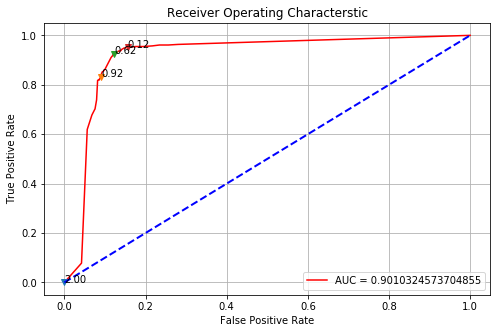

In [18]:
innomatics.classification_metric(y_test,y_pred1,y_pred_prob1[:,1],label=['no','yes'],n=10,verbose=True)

In [19]:
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [20]:
model_ada= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),n_estimators=50,learning_rate=1)# here we can keep any model(like logistic reg)

In [21]:
model_ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                            

In [22]:
y_pred2= model_ada.predict(x_test)
y_pred_prob2= model_ada.predict_proba(x_test)

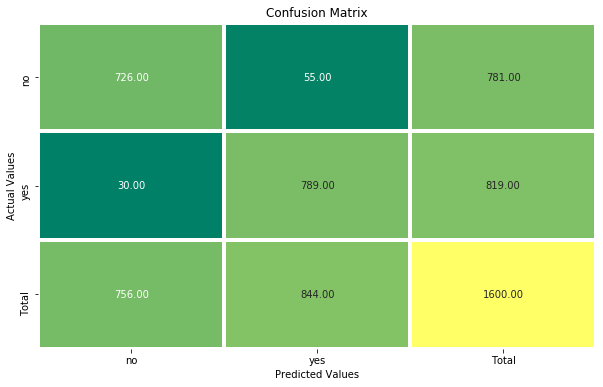

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       781
           1       0.93      0.96      0.95       819

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600


************************************Kappa Score************************************


Kappa Score = 0.8936110294071631

******************************Area Under Curve Score******************************


AUC Score = 0.946473714079348
Number of probabilities to build ROC = 148


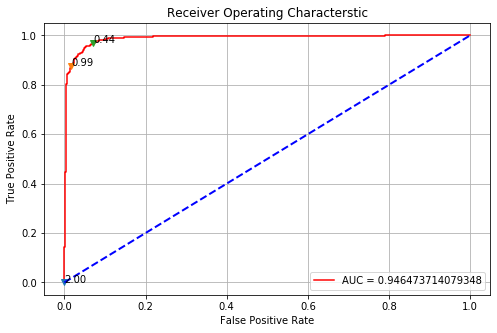

In [23]:
innomatics.classification_metric(y_test,y_pred2,y_pred_prob2[:,1],label=['no','yes'],n=50,verbose=True)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
model_grad = GradientBoostingClassifier(n_estimators=500,max_depth=10)  # this defaultly takes DT

In [26]:
model_grad.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [27]:
y_pred3= model_grad.predict(x_test)
y_pred_prob3 = model_grad.predict_proba(x_test)

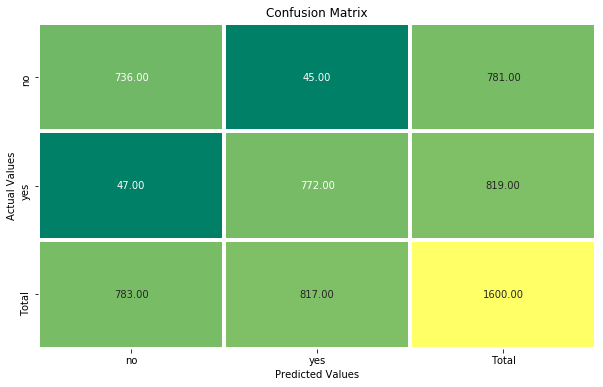

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       781
           1       0.94      0.94      0.94       819

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600


************************************Kappa Score************************************


Kappa Score = 0.8849419316311201

******************************Area Under Curve Score******************************


AUC Score = 0.9424972523564074
Number of probabilities to build ROC = 178


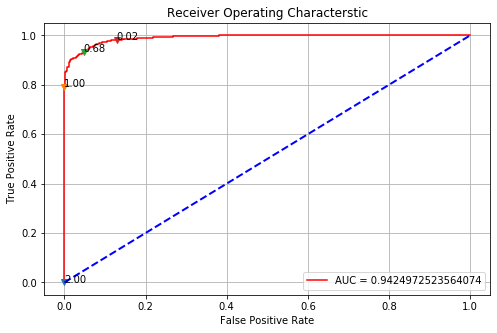

In [28]:
innomatics.classification_metric(y_test,y_pred3,y_pred_prob3[:,1],label=['no','yes'],n=50,verbose=True)